# Inargural Project 2023

Indholdsfortegnelse


Imports and set magics

In [2]:
%load_ext autoreload
%autoreload 2
import HouseholdSpecializationModel as HSM

import pandas as pd
from scipy import optimize
import numpy as np

%matplotlib inline
# %matplotlib qt
from matplotlib import pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

from IPython import display



In [3]:
# load class
model = HSM.HouseholdSpecializationModelClass()

## Question 1

/Users/felixjohannespettersson/Documents/projects-2023-scb/inauguralproject/HouseholdSpecializationModel.py:77: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**potens + par.alpha * HF**potens)**potens**-1
/Users/felixjohannespettersson/Documents/projects-2023-scb/inauguralproject/HouseholdSpecializationModel.py:77: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**potens + par.alpha * HF**potens)**potens**-1
/Users/felixjohannespettersson/Documents/projects-2023-scb/inauguralproject/HouseholdSpecializationModel.py:96: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho) # RuntimeWarning: invalid value encountered in reciprocal


for alpha = 0.25 and sigma = 0.5, HF/HM = 0.5454545454545454
for alpha = 0.25 and sigma = 1.0, HF/HM = 0.3076923076923077
for alpha = 0.25 and sigma = 1.5, HF/HM = 0.21428571428571427
for alpha = 0.5 and sigma = 0.5, HF/HM = 1.0
for alpha = 0.5 and sigma = 1.0, HF/HM = 1.0
for alpha = 0.5 and sigma = 1.5, HF/HM = 1.0
for alpha = 0.75 and sigma = 0.5, HF/HM = 1.8333333333333333
for alpha = 0.75 and sigma = 1.0, HF/HM = 3.25
for alpha = 0.75 and sigma = 1.5, HF/HM = 4.666666666666667


Text(0.5, 1.0, '$H_F/H_M$ for varying alpha and sigma values')

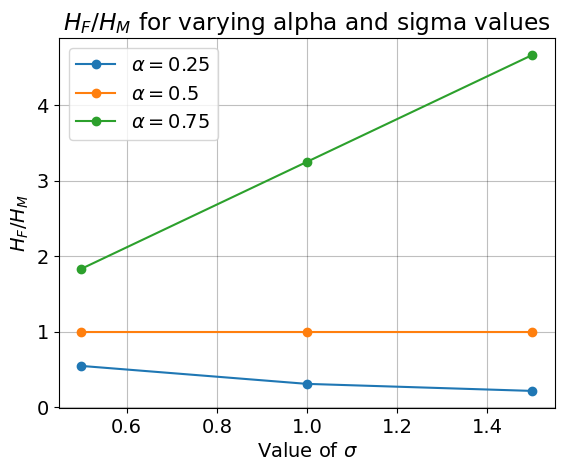

In [4]:

# List of parameters
alpha_list = [0.25,0.5,0.75]
sigma_list = [0.5,1.0,1.5]

# Create empty list for solutions
solution_list = []

# For loop to solve problem for list of parameters
for alpha in alpha_list:
    model.par.alpha = alpha
    for sigma in sigma_list:
        model.par.sigma = sigma
    
        # Solve for given alpha and sigma
        solution = model.solve_discrete()

        # Unpack solution
        HF = solution.HF
        HM = solution.HM
        solution_list.append(HF/HM)

        # Print results
        print(f'for alpha = {alpha} and sigma = {sigma}, HF/HM = {HF/HM}')

# Split solutions by value of alpha
alpha_025 = solution_list[0:3]
alpha_05 = solution_list[3:6]
alpha_075 = solution_list[6:9]

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sigma_list,alpha_025, label = '$α = 0.25$',marker ='o')
ax.plot(sigma_list, alpha_05, label = '$ α= 0.5$', marker = 'o')
ax.plot(sigma_list, alpha_075, label = '$α = 0.75$', marker = 'o') 
ax.set_xlabel('Value of $\sigma$')
ax.set_ylabel('$H_F/H_M$')
ax.legend(loc='upper left')
ax.set_title("$H_F/H_M$ for varying alpha and sigma values")

## Question 2

start solve_wF_vec()
wf_vec = [0.8 0.9 1.  1.1 1.2]
LM_vec = [8.  7.5 7.  7.  6. ]
HM_vec = [1.  1.5 1.5 1.5 1.5]
LF_vec = [0.  1.  1.5 2.  3. ]
HF_vec = [8.  7.5 7.  7.  6.5]
end solve_wF_vec()


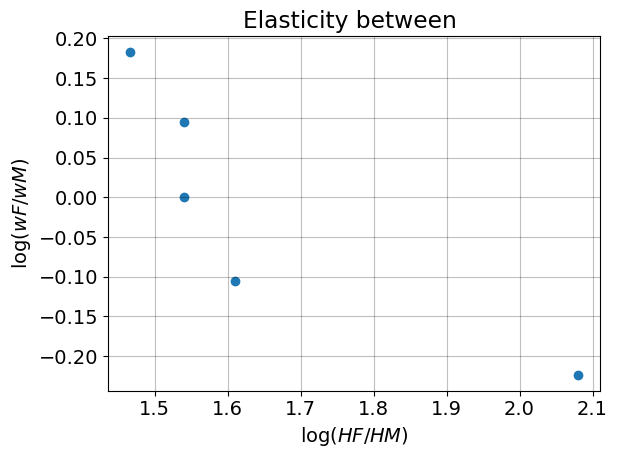

In [5]:
# a. solve discrete
solution = model.solve_wF_vec(discrete = True, do_print=True)

# b.  extract solution
HF_vec = solution.HF_vec
HM_vec = solution.HM_vec
wF_vec = model.par.wF_vec

# c. transform data for plot 
log_HFM = np.log(HF_vec/HM_vec)
log_wFM = np.log(wF_vec)  # note that wM = 1, so wF_vec/wM = wF_vec

# d. create figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(log_HFM,log_wFM)
ax.set_title('Elasticity between ')
ax.set_xlabel('$\log(HF/HM)$')
ax.set_ylabel("$\log(wF/wM)$")
fig.tight_layout()

## Question 3

start solve_wF_vec()
wf_vec = [0.8 0.9 1.  1.1 1.2]
LM_vec = [8.07106954 7.83005842 7.24782479 6.67355122 6.11438769]
HM_vec = [1.22146166 1.27170398 1.39483405 1.52062032 1.64908761]
LF_vec = [1.00000000e-08 4.52250223e-01 1.39480183e+00 2.16435053e+00
 2.79754473e+00]
HF_vec = [7.97815942 7.73932277 7.24781959 6.84913789 6.51863266]
end solve_wF_vec()


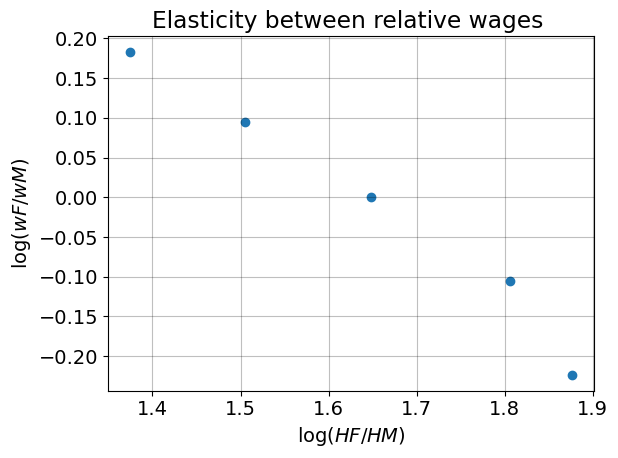

In [6]:
# a. solve continously
solution = model.solve_wF_vec(discrete = False, do_print=True)

# b. extract solutions
HF_vec = solution.HF_vec
HM_vec = solution.HM_vec
wF_vec = model.par.wF_vec

# c. transform data for plotting
log_HFM = np.log(HF_vec/HM_vec)
log_wFM = np.log(wF_vec)  # note that wM = 1, so wF_vec/wM = wF_vec

# d. create figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(log_HFM,log_wFM)
ax.set_title('Elasticity between relative wages ')
ax.set_xlabel('$\log(HF/HM)$')
ax.set_ylabel('$\log(wF/wM)$')
fig.tight_layout()

## Question 4

In [ ]:
# code for solving the model (remember documentation and comments)

## Question 5

In [ ]:
# code for solving the model (remember documentation and comments)